# Week 1 Project

Welcome to the first week's project for Deep Learning Essentials!

In this notebook, we will cover:

1. Basics of PyTorch

2. Creating a Neural Network

3. Deep Learning Intuitions

Before running this notebook, **please create a copy of this yourself so you can edit it as needed**. This can be done by just pressing "Copy to Drive", which is on the toolbar above, next to "+ Code" and "+ Text".

Now, run the below cell to install the dependencies for this project:

In [ ]:
!pip install -qqq emoji torchviz

     |████████████████████████████████| 216 kB 26.3 MB/s 


Next, mount the data required for this assignment, set up the project directory, and import the necessary libraries.

Note: **You should select "Add shortcut to Drive" on the "deep-learning-essentials" folder to have it appear under "/content/drive".**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
#@markdown Specify the full "deep-learning-essentials" folder in your Google Drive.
#@markdown You can find this by navigating in the folder icon tab on the left.
directory = '/content/drive/MyDrive/DLE-Projects/' #@param {type:"string"}

sys.path.append(directory)
sys.path.append(os.path.join(directory, 'utils'))
os.chdir(os.path.join(directory, 'Week1'))

import numpy as np
import torch
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt
from assignment_helpers import check_answer

## Part 1: Basics of PyTorch

While deep learning can be expressed in highly mathematical terms, I like to think of it as a type of computer programming.<mark> Each layer is a function that takes inputs and returns outputs.</mark> Models are APIs which can return pre-defined data structures, and they can be trained using objects called Trainers.

For deep learning, we have a very useful Python library called PyTorch. While there are other deep learning libraries such as Tensorflow, Theano, CNTK, etc. we will focus on PyTorch simply because it is the most popular.

In many ways, to know Deep Learning is to know PyTorch, and vice-versa. As such, we'll start this project with a primer on PyTorch!

#### PyTorch Tensor

PyTorch has its own classes for arrays and data, similar to how Numpy has objects like ```np.array```. In order to perform PyTorch operations, we just to convert data into a PyTorch Tensor (```torch.Tensor```).


For reference, PyTorch tensors are covered in the following documenation: https://pytorch.org/docs/stable/tensors.html

In the cell below, we do a few mathematical computations using PyTorch:

In [ ]:
# Create a PyTorch tensor with value 5 and another with value 7
A = torch.tensor(5)
B = torch.tensor(7)

# Evaluate the following expression: C = A(A+B^2)+(A-B)^B
C = A * (A+(B**2))+(A-B)**B

# Print C
print(C)

check_answer(C.item() == 142)

tensor(142)


## Correct! 🎉

In the cell below, create a NumPy array (with random values) with dimensions (4x4) and convert it to a PyTorch tensor.

In [ ]:
numpy_array = np.random.rand(4,4) # TODO: Implement here
pt_tensor = torch.from_numpy(numpy_array) # TODO: Implement here

print(f"Numpy array: {numpy_array}")
print()
print(f"Torch tensor: {pt_tensor}")

check_answer(type(pt_tensor)==torch.Tensor and numpy_array.shape==(4, 4))

Numpy array: [[0.95595216 0.79585306 0.29761771 0.54339312]
 [0.6141036  0.34143325 0.39568473 0.90686635]
 [0.19446779 0.45829421 0.09906138 0.42688381]
 [0.36511475 0.91624731 0.87804418 0.80437293]]

Torch tensor: tensor([[0.9560, 0.7959, 0.2976, 0.5434],
        [0.6141, 0.3414, 0.3957, 0.9069],
        [0.1945, 0.4583, 0.0991, 0.4269],
        [0.3651, 0.9162, 0.8780, 0.8044]], dtype=torch.float64)


## Correct! 🎉

PyTorch tensors have many attributes. Here are a few useful ones:

1. View the shape of tensors using ```.size()```.

2. Reshape PyTorch tensors easily using  ```.view()```.

3. Convert them to GPU-enabled tensors using ```.cuda()``` and back to CPU using ```.cpu()```. (For this to work, you'll have to go to Runtime > Change Runtime Type > Hardware Accelerator > GPU)

4. Convert them back to numpy using ```.numpy()```.

In the cell below, try each command:

In [ ]:
# Print size of pt_tensor
print(f"Shape of Tensor: {pt_tensor.size()}")

# Reshape pt_tensor to (16,)
pt_tensor = pt_tensor.view(16, )
print(pt_tensor)
print(f"Before: {pt_tensor.dtype}")

# Change data type from int to float -- at first it didn't work unless we changed the datatype
pt_tensor = pt_tensor.float()
print(f"After: {pt_tensor.dtype}")

# Make pt_tensor GPU-enabled
if torch.cuda.is_available():
  pt_tensor = pt_tensor.cuda()

# No to-do here, these lines just pass the tensor through a GPU-enabled layer.
pt_layer = nn.Linear(16, 10).cuda()
layer_output = pt_layer(pt_tensor)

# Finally, convert the output back into a CPU-backed numpy array:
numpy_output = layer_output.cpu()

check_answer(numpy_output.shape==(10,))

Shape of Tensor: torch.Size([4, 4])
tensor([0.9560, 0.7959, 0.2976, 0.5434, 0.6141, 0.3414, 0.3957, 0.9069, 0.1945,
        0.4583, 0.0991, 0.4269, 0.3651, 0.9162, 0.8780, 0.8044],
       dtype=torch.float64)
Before: torch.float64
After: torch.float32


## Correct! 🎉

As you see from above, ```nn.Linear``` creates a simple fully-connected layer. This means all the inputs to the layer are connected to all the outputs.

The image below is a schematic of ```pt_layer```. Each circle represents one feature, and each line is a weight.

Quick quiz: How many weights does ```pt_layer``` have?

<img src="https://drive.google.com/uc?id=10xA7A_O-RHv_Y0ertE2K11nukiE3qKJa" width="600">

In [ ]:
# Put your answer here!

num_weights = 160

check_answer(num_weights==np.multiply(*pt_layer.weight.size()))

## Correct! 🎉

Great! In a fully connected layer, every input feature is connected to every output feature (hence the name).

Later in this course, we'll go into layers which are not fully connected (eg. convolutional).

Another point to <mark>note here is that in the case where the number of layers equals 1, a neural network is really just a linear model (like linear regression or logistic regression).</mark>

### Multiple Layers

The great thing about using PyTorch is that passing inputs through multiple layers is very straightforward -- <mark>we can just treat each layer like a function and "chain" the outputs.</mark>

In the cell below, create another ```nn.Linear``` layer with dimensions such that the result of feeding ```pt.tensor``` through both layers results in a tensor of size 1.

In [ ]:
# Create second_layer and "feed" pt_tensor through pt_layer and second_layer.
# Remember, GPU-enabled layers only accept inputs from GPU-enabled layers!

second_layer = nn.Linear(10,1).cuda()

output = second_layer(layer_output)

print(f'Outout:{output}')
print(f'{second_layer.weight.size()}')


check_answer(output.size()==torch.Size([1]))

Outout:tensor([0.2417], device='cuda:0', grad_fn=<AddBackward0>)
torch.Size([1, 10])


## Correct! 🎉

### The Weights

When we create an instance of ```nn.Linear```, the weights are randomly initialized. Through training, these weights become tuned to the task at hand.

You can access the actual weights themselves using ```.weight```. The weights are PyTorch Parameters (object type ```torch.nn.parameter.Parameter```), which are essentially ```torch.Tensor``` objects with ```requires_grad=True```. The same is true of the bias, which is stored in ```.bias```.

We're going to practice manually setting weights in a linear layer just so PyTorch layers do not feel so abstract.

In the exercise below, we will be just setting all weights of ```pt_layer``` to ```1```s, and the bias to ```0```s. Then, we will pass through a tensor that is just integers, incremented from ```[1,...,16]```.

What do you expect the output of this layer to be?

Think this through for a second before implementing the code below.

In [ ]:
# Playground

### WEIGHTS ###
print(f"Weights of the layer -> {pt_layer.weight}")
print(pt_layer.weight.size())

# pt_layer_weights_ones = torch.ones(pt_layer.weight.size())
# print(pt_layer_weights_ones)
# print(pt_layer_weights_ones.size())

### BIAS ###

print(f"The biases of the layer -> {pt_layer.bias}")
print(pt_layer.bias.size())

Weights of the layer -> Parameter containing:
tensor([[ 0.1335,  0.1521, -0.0343,  0.2169, -0.1502,  0.1630,  0.0393, -0.1085,
         -0.0655, -0.1870,  0.0524, -0.0184, -0.0216, -0.1905, -0.1098, -0.1431],
        [-0.0118, -0.2329, -0.1780, -0.1028,  0.1942,  0.1609, -0.0349, -0.1712,
         -0.0837, -0.0722,  0.0503, -0.0268, -0.2293,  0.1125,  0.2490,  0.0347],
        [ 0.1297,  0.2429,  0.0084, -0.0671, -0.2057,  0.2047,  0.1830, -0.0097,
         -0.2029,  0.1064,  0.1047, -0.2142, -0.0749,  0.1207, -0.2044, -0.0412],
        [-0.0450, -0.0144,  0.0731,  0.1179, -0.0590, -0.1899, -0.1930, -0.2226,
         -0.2347, -0.1343, -0.2097, -0.2085,  0.1302, -0.0494,  0.0547,  0.0917],
        [ 0.1728, -0.1123, -0.2463, -0.2160, -0.0898, -0.2447, -0.1194, -0.1046,
          0.0494,  0.2272, -0.2040, -0.2320, -0.1933, -0.0301, -0.0214, -0.2112],
        [-0.2183,  0.2304, -0.1193, -0.0235,  0.0099,  0.2170,  0.1970,  0.1122,
          0.0235, -0.1976,  0.2030, -0.2295, -0.1988,  0.0

In [ ]:
# This is our input tensor
input_tensor = torch.Tensor(list(range(1, 17)))

# Create a PyTorch tensor of ones that has the same shape as pt_layer.weight
pt_layer_weights_ones = torch.ones(pt_layer.weight.size()) # Size -> [10,16]

# Set the weights of pt_layer as pt_layer_weights_ones. (You will need to convert it to a PyTorch Parameter)
pt_layer.weight = torch.nn.Parameter(pt_layer_weights_ones)

# Similarly, set all the bias parameters of pt_layer as zero.
pt_layer_bias_zeros = torch.zeros(pt_layer.bias.size())
pt_layer.bias = torch.nn.Parameter(pt_layer_bias_zeros)

# Finally, pass the result through pt_layer
pt_layer_output = pt_layer(input_tensor)

check_answer(pt_layer_output.sum().item()==sum(list(range(1, pt_layer.in_features+1)))*pt_layer.out_features)

## Correct! 🎉

If you got this correct, the right answer is that the output is just a tensor of length 10 containing 136's!

The basic idea is that in a linear layer with all ```1``` weights, and ```0``` bias, we are simply adding all the input values (which in this case is the sum of ```[1,...,16]```).

### The Gradients

What is the purpose of the ```requires_grad=True``` attribute?

While we can do math operations in PyTorch, <mark>it is mainly useful for its ability to automatically differentiate functions.</mark>

Let's say we want the derivative of $f(x)$ at a given value of $x$, ie. $\frac{d}{dx}f(x)|_{x}$.

(Feel free to hop back onto the lecture pages in terms of why this is important to calculate!)

For simple functions like $f(x) = x^2$, we know the analytical expression for $f'(x)$ is just $2x$. As such, evaluating the dervative at a point, like $x=5$ is just plug-and-play.

When it comes to neural networks, $f'(x)$ is mostly intractable -- the layers are chained operations which can grow arbitrarily long.

This is where autograd comes in. Given a function $f(x)$ which is computed by chaining many successive operations, it computes the derivative/gradients with respect to any $x$.

Let's see a basic example of this in action. In the cell below, we compute the derivative of $f(x) = x ^ 2$ using autograd (No work for you to do there).

This tutorial is very helpful for understanding autograd more: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



In [ ]:
# First, we set x = 5
x = torch.tensor(5., requires_grad=True)

# Second, we evaluate y = x ^ 2
y = x ** 2

# Third, we use .backward() to compute the derivative
y.backward()

# Finally, we print out the derivative
print(f'Derivative using formula: {2*x}, Autograd: {x.grad}')

Derivative using formula: 10.0, Autograd: 10.0


To gain some appreciation for autograd, let's add some complexity to the function.

Rather than just one operation, let's string together several operations on x:

$f(x) = 3(4x+9((\frac{x}{3})^2 + 2)))$

In the cell below, rather than type out the entire equation, compute $f(x)$ by expanding out the order of operations, with one per line. Then compute the derivative at $x=5$.

In [ ]:
# In this cell, set x = 5 and compute f(x) using one line per operation.
# Then call y.backward().

x = torch.tensor(5., requires_grad=True)

### THIS
# x1 = (x/3)
# x2 = x1 ** 2
# x3 = x2 + 2
# x4 = x3 * 9
# x5 = x4 + 4*x
# y = x5 * 3

# Keep adding x's until you finish!

### OR THIS
y = 3*(4*x + 9*(((x/3)**2) + 2))


y.backward()

print(f"Autograd: {x.grad}")
check_answer(x.grad == 6*(x+2))

Autograd: 42.0


## Correct! 🎉

We can verify that we got the right answer by getting the closed-form solution of $f'(x) = 6(x+2)$.

You can visualize the graph that PyTorch generates implictly with all those operations:

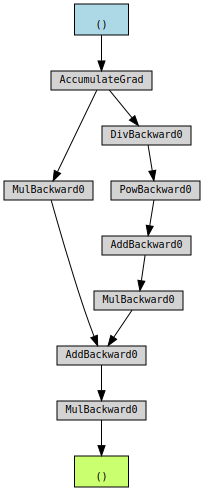

In [ ]:
# The make_dot function of TorchViz makes visualizing graphs easy!
make_dot(y)

### Wait, what does ```.backward()``` do exactly?

PyTorch is able to compute the derivative of functions like the one above by "chaining" the derivatives (aka using the Chain Rule).

Let's say we have a simple function, $y = 5x^2$.

Using the chain rule and setting $u = x^2$, we can write:

$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$

We know that:

$\frac{dy}{du} = 5$, $\frac{du}{dx} = 2x$

Just multiply those together and get:

$\frac{dy}{dx} = 5(2x) = 10x$


This is essentially how ```.backward()``` works: it computes $\frac{dy}{dx}$ by computing $\frac{dy}{du}$ and $\frac{du}{dx}$ separately.

For a more in-depth tutorial on how this works under the hood, visit https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html. (TL;DR: We compute the derivatives of all variables with respect to all other variables and collect them into a matrix called the Jacobian).

Let's try actually coding this example in the cell below:

Evaluate the derivative of $y$ at $x = 5$.

Note: to save space, PyTorch usually deletes intermediate gradients after running ```.backward()```. To keep them, just call ```.retain_grad()``` on variables you want to save.



In [ ]:
# Create a tensor x = 5
x = torch.tensor(5., requires_grad=True)

# Compute y = 5x^2 as two separate lines
u = x ** 2
y = 5 * u

# Retain the intermediate gradient
u.retain_grad()

# Run .backward()
y.backward()

# Print out the gradient of x and u
print(f"Gradient of x -> {x.grad}")
print(f"Gradient of u -> {u.grad}")

check_answer(x.grad == 10*x and u.grad == 5)

Gradient of x -> 50.0
Gradient of u -> 5.0


## Correct! 🎉

Great! As you can verify from above, ```u.grad``` corresponds to $\frac{dy}{du}$, while ```x.grad``` corresponds to $\frac{dy}{dx}$.

### The Nitty Gritty of Gradients

How are the gradients above used to train neural networks?

In the most basic case, we can create a model with no hidden layers, such that $y = wx+b$, (a linear regression model).

This is equivalent to a ```nn.Linear(1, 1)``` layer.

During training, we want the gradients of $w$ and $b$. In order to train the network, we also add a loss function on top of the model. In total, our basic model "function" is:

$f(x) = \mathcal{L}(wx+b, y)$, where $\mathcal{L}$ is the loss function, and $y$ is the true value of the output we want to learn.

In the case of a loss function like mean-squared error, the function looks like:

$$f(x) = \frac{1}{N}\sum_{i=1}^N(wx_i+b - y_i)^2$$

In the cell below, construct a simple linear regression model (just one weight and one bias) with mean-squared error.

Using the given $x$ and $y$ data points, compute the derivative of the loss, $\mathcal{L}$, with respect to $w$ and $b$.

Set $w=1$ and $b=0$.


In [ ]:
# Here is the provided x and y tensor
np.random.seed(0)
x = np.random.normal(0, 5, 30)
y = np.abs(3 * x + 2)
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)

# Initialize parameters w and b
w = torch.tensor(1., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

# Compute y_hat using w and b
y_hat = w*x + b

# Compute the loss
loss = (y_hat - y) ** 2
loss = loss.sum() / len(x)

# Use backward on loss to compute gradients
loss.backward()

# Print the loss
print(f"loss -> {loss}")

# Print the gradient of L with respect to w and b
print(f"Gradient of L with respect to w -> {w.grad}")
print(f"Gradient of L with respect to b -> {b.grad}")

check_answer(int(w.grad)==-45 and int(b.grad)==-24 and int(loss.item()) == 258)

loss -> 258.5468409351736
Gradient of L with respect to w -> -45.32195281982422
Gradient of L with respect to b -> -24.97298240661621


## Correct! 🎉

Awesome! You've just computed gradients for a linear regression model!

The loss is quite high, but that's not your fault -- the weights were off!

As a next step, let's try to "improve" our model by changing the parameters $w$ and $b$ according to the gradients.

You may remember that the formula for updating weights from Gradient Descent:

$w_{new} = w_{old} - \eta \nabla L(w_{old})$

To be precise, ```w.grad```$ = \nabla L(w_{old})$ and ```b.grad``` = $\nabla L(b_{old})$.

Using this information and a learning rate $\eta=0.01$, make updates to $w$ and $b$ and recompute the loss.

In [ ]:
# Set learning rate
lr = 0.01

# Update w and b
w_new = w - lr * w.grad
b_new = b - lr * b.grad

# Compute the new y_hat
y_hat_new = w_new*x + b_new

# Compute the new loss
loss_new = (y_hat_new - y) ** 2
loss_new = loss_new.sum() / len(x)
# Print the loss and gradients for w and b
print(f"loss -> {loss_new}")

print(f"Gradient of L with respect to new w -> {w_new.grad}")
print(f"Gradient of L with respect to new b -> {b_new.grad}")

check_answer(int(loss_new.item())==239)

loss -> 239.35033123341225
Gradient of L with respect to new w -> None
Gradient of L with respect to new b -> None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


## Correct! 🎉

If you've done this correctly, the loss should have gone down!

In practice, this process is done iteratively, so that each step improves upon the next.

Using a for-loop, update $w$ and $b$ 10 times using the same method as above.

Note: Be careful when updating $w$ and $b$ -- you may need to do some extra work to get it working beyond just setting ```w = w - lr * w.grad```. As a hint, calling ```.item()``` returns the value of a tensor as a Python number. Furthermore, to turn on gradients for a tensor, you can just add ```.requires_grad_(True)``` to the end.

In [ ]:
# Set learning rate
lr = 0.01

# Initialize parameters w and b
w = torch.tensor(1., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

for step in range(10):

  # Compute y_hat using w and b
  y_hat = w*x + b

  # Compute the loss
  loss = (y_hat -y) ** 2
  loss = loss.sum()/len(x)

  # Print the loss
  print(loss)
  # Compute gradients
  loss.backward()

  # Update w and b
  w = w.item() - lr * w.grad
  w = torch.tensor(w, requires_grad=True)
  b = b.item() - lr * b.grad
  b = torch.tensor(b, requires_grad=True)

check_answer(int(loss.item()) == 205)

tensor(258.5468, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(239.3503, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(233.3294, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(228.7456, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(224.4383, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(220.2887, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(216.2806, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(212.4082, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(208.6668, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(205.0519, dtype=torch.float64, grad_fn=<DivBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


## Correct! 🎉

Congrats! If you got this through part, you've just trained a basic model using Stochastic Gradient Descent (SGD). The loss has dropped at each step, which means you've done the job correctly.

However, it looks like the loss is still relatively high!

This is in part due to the fact that the data is actually non-linear:

$$y = abs(3x+2)$$

This is a plot of what it looks like:


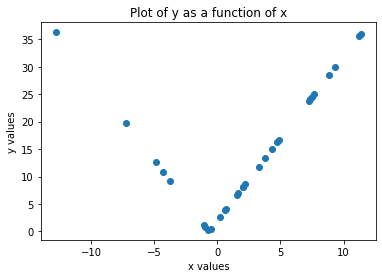

In [ ]:
# Plotting our function

x_plot = x.detach().numpy()
y_plot = y.detach().numpy()
plt.scatter(x_plot, y_plot)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of y as a function of x')
plt.show()

Our simple linear regression model does not work so well because it is just a linear model. In other words, there's no way we can fit a line through check-marked shaped data!

### Finally... A neural network!

Luckily, a neural network is meant to fit non-linear data and should help learn this data better.

We start with the same linear regression model from before (adding subscripts to weights since we'll be adding more weights now).

$f(x) = w_1x + b_1$

Now, we'll apply a *non-linear activation function* to $w_1x + b_1$. There are a lot of potential ones, but for simplicity let's use ReLU, which stands for Rectified Linear Unit.

The gist of ReLU (denoted as $\sigma$) is that if the input is positive, then it just returns the input. If the input is negative, it returns 0.

ReLU: $\sigma(z) = z $ if $z >= 0$, else 0.

So far, our equation looks like this:

$f(x) = \sigma(w_1x + b_1)$

For the next layer, we'll be using the output of this function as the input of a linear regression:

$f(x) = w_2(\sigma(w_1^Tx + b_1)) + b_2$

This is a whole lot of notation, but you just need to get the main idea: We're using the output of the linear regression (plus activation) as the input of another linear regression.

This is the same thing you did above with ```nn.Linear```, except now in raw PyTorch.

In the cell below, perform the same optimization you did with linear regression, but now just with a neural network.

Start with $w_1 = w_2 = 1$, and $b_1 = b_2 = 0$.

Also, start with learning rate = 0.001!

In [ ]:
# Set learning rate
lr = 0.001

# Define the ReLU function
def ReLU(z):
  z[z < 0] = 0
  return z

# Initialize parameters w1, w2 and b1, b2
w1 = torch.tensor(1., requires_grad=True)
w2 = torch.tensor(1., requires_grad=True)

b1 = torch.tensor(0., requires_grad=True)
b2 = torch.tensor(0., requires_grad=True)

for step in range(10):

  # Compute y_hat using w and b
  y_hat = w2 * (ReLU(w1 * x + b1)) + b2

  # Compute the loss
  loss = (y_hat - y) ** 2
  loss = loss.sum() / len(x)

  # Print the loss
  print(loss)

  # Compute gradients
  loss.backward()

  # Update w and b
  w1 = w1.item() - lr * w1.grad
  w1 = torch.tensor(w1, requires_grad=True)
  b1 = b1.item() - lr * b1.grad
  b1 = torch.tensor(b1, requires_grad=True)
  w2 = w2.item() - lr * w2.grad
  w2 = torch.tensor(w2, requires_grad=True)
  b2 = b2.item() - lr * b2.grad
  b2 = torch.tensor(b2, requires_grad=True)

check_answer(int(loss.item()) == 70)

tensor(199.2902, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(172.6538, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(146.8816, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(123.8799, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(105.1059, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(91.1554, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(81.7086, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(75.8394, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(72.4537, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor(70.6109, dtype=torch.float64, grad_fn=<DivBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

## Correct! 🎉

If this part worked for you, congrats!! You've officially trained a neural network! You'll notice that the loss is quite a bit lower than just a simple linear model, and that's the exciting part!

We hope you will trust us that this intuition-building exercise will pay off.

**This marks the end of the project for this week!**

🔥🔥🔥 **Great job, and we'll see you next week, where we'll actually be training neural networks for some real-world tasks!!** 🔥🔥🔥

### Bonus

There are lots of deep learning techniques you can use with even the most basic neural networks. We want you to try the following tweaks to the model you create above.

1. What happens if you change the learning rate? Try 0.1 and 0.001. What happens to the loss? What do you think is driving the difference?

2. What happens if you train for longer than 10 steps? (eg. 100, 1000) Can you plot the results with the x-axis as the number of steps, and y-axis as the loss?

3. Can you implement an additional layer? How does it either help or hurt the performance of the model?



## Trying Different Learning Rates and Step Size

In [ ]:
# Set learning rate
lr_list = [0.01, 0.1]
steps_list = [10, 100, 1000]

for steps in steps_list:
  print(f"Training Using -> {steps} Steps")
  for lr in lr_list:
    print(f"Learning Rate -> {lr}")

    # Initialize parameters w1, w2 and b1, b2
    w1 = torch.tensor(1., requires_grad=True)
    w2 = torch.tensor(1., requires_grad=True)

    b1 = torch.tensor(0., requires_grad=True)
    b2 = torch.tensor(0., requires_grad=True)

    for step in range(steps):
      # Compute y_hat using w and b
      y_hat = w2 * (ReLU(w1 * x + b1)) + b2
      # Compute the loss
      loss = (y_hat - y) ** 2
      loss = loss.sum() / len(x)
      # Print the loss
      print(f"Loss for Step Size -> {steps} with learning rate -> {lr} in Step number -> {step} is -> {loss}")
      # Compute gradients
      loss.backward()
      # Update w and b
      w1 = w1.item() - lr * w1.grad
      w1 = torch.tensor(w1, requires_grad=True)
      b1 = b1.item() - lr * b1.grad
      b1 = torch.tensor(b1, requires_grad=True)
      w2 = w2.item() - lr * w2.grad
      w2 = torch.tensor(w2, requires_grad=True)
      b2 = b2.item() - lr * b2.grad
      b2 = torch.tensor(b2, requires_grad=True)

Training Using -> 10 Steps
Learning Rate -> 0.01
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 0 is -> 199.29020278807863
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 1 is -> 115.39006414838514
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 2 is -> 266.2749809489008
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 3 is -> 77.71429366351632
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 4 is -> 111.1439878975148
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 5 is -> 252.68736061743226
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 6 is -> 71.01572891600757
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 7 is -> 90.94991484382756
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 8 is -> 185.519698900034
Loss for Step Size -> 10 with learning rate -> 0.01 in Step number -> 9 is -> 94.4818

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 73 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 74 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 75 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 76 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 77 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 78 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 79 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 80 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 81 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 82 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 83 is -> nan
Loss for Step Size -> 100 with learning rate -> 0.1 in Step number -> 84 is -> nan
Loss

**Conclusions:**

| Sr.No | Learning Rate  | Step Size | Conclusion   |
|------ |--------------  |---------- | -------------|
| 1     | 0.01           | 10        | The loss increases and decreases in between the steps and the final loss is 94.48, the model struggles to achieve minimum loss value.           |
| 2     | 0.1            | 10        | The model reaches a minimum loss value of 9.20 in just 5 steps.            |
| 3     | 0.01           | 100       |  Minimum loss value of 54.78, the loss decreases for most steps with only certain steps showing increase in loss.            |
| 4     | 0.1            | 100       | Minimum loss value in 9.20 in just 5 steps.          |
| 5     | 0.01           | 1000      | A minimum loss value of 47.53, with loss steadily decreasing but fluctuations at certain steps.             |
| 6     | 0.1            | 1000      | A loss value of 9.20 in just 5 steps.             |

## 3. Adding Another Layer

In [ ]:
# Set learning rate
lr = 0.001

# Initialize parameters w1, w2 and b1, b2
w1 = torch.tensor(1., requires_grad=True)
w2 = torch.tensor(1., requires_grad=True)
w3 = torch.tensor(1., requires_grad=True)

b1 = torch.tensor(0., requires_grad=True)
b2 = torch.tensor(0., requires_grad=True)
b3 = torch.tensor(0., requires_grad=True)

for step in range(10):

  # Compute y_hat using w and b
  y_hat = w3 * (ReLU(w2 * (ReLU(w1 * x + b1)) + b2 )) + b3

  # Compute the loss
  loss = (y_hat - y) ** 2
  loss = loss.sum() / len(x)

  # Print the loss
  print(f"Loss: {loss}")

  # Compute gradients
  loss.backward()

  # Update w and b
  w1 = w1.item() - lr * w1.grad
  w1 = torch.tensor(w1, requires_grad=True)
  b1 = b1.item() - lr * b1.grad
  b1 = torch.tensor(b1, requires_grad=True)
  w2 = w2.item() - lr * w2.grad
  w2 = torch.tensor(w2, requires_grad=True)
  b2 = b2.item() - lr * b2.grad
  b2 = torch.tensor(b2, requires_grad=True)
  w3 = w3.item() - lr * w3.grad
  w3 = torch.tensor(w3, requires_grad=True)
  b3 = b3.item() - lr * b3.grad
  b3 = torch.tensor(b3, requires_grad=True)

Loss: 199.29020278807863
Loss: 158.3164348783003
Loss: 117.50552499281119
Loss: 87.15605553151856
Loss: 72.76940180538493
Loss: 68.91660963107299
Loss: 68.24297639744103
Loss: 68.0497769703521
Loss: 67.90351843447735
Loss: 67.76191530573959


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Conclusion:

By Adding another layer -> The loss steadily decreases, maybe we can say the network stabilises. So another layer helps the model peformance.